# Sistema generalizado de Lotka-Volterra

##### **¿Cómo medir claramente el impacto de la intensificación?**

En la teoría clásica de metapoblaciones se asume que las poblaciones siempre están en riesgo de extinguirse localmente, debido a perturbaciones ambientales u otros factores. Esto no se toma en cuenta en este modelo, lo cual dificulta distinguir entre el decaimiento de la biodiversidad que se debe al impacto de la intensificación y el que se debe a la dinámica del sistema Lotka-Volterra. 

En la extensión del modelo que propuse observé una dificultad adicional en las simulaciones preliminares. La riqueza al final del tiempo de simulación es la misma con diferentes intensidades de manejo, pero hay diferencias en el tiempo que tarda en alcanzar ese nivel.

Entonces, **¿cómo se puede medir de forma más clara el impacto de la intensificación?**

* *¿Se puede modificar el sistema Lotka-Volterra de forma que las poblaciones tiendan a la extinción local como en el modelo clásico?* Entonces se aseguraría que las especies sobreviven debido a la dinámica de metapoblación.
* *¿Se pueden encontrar parámetros para el sistema Lotka-Volterra que aseguren la coexistencia de las 10 especies originales?* Entonces se aseguraría (¿o no?) que el decaimiento de la riqueza se debe a la intensificación. 
* *¿Es conveniente medir, además de la riqueza final, el tiempo que tardó en alcanzar ese nivel?* Entonces, ¿cómo comparar los resultados? Al graficar riqueza vs tiempo se obtienen curvas de supervivencia, pero estudiarlas desde ese enfoque parece innecesariamente complicado.

Intentaré el 2° punto.

### Sistema LV sin espacio

In [2]:
# Módulos necesarios
import numpy as np
import seaborn
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [3]:
np.set_printoptions(precision=3)

In [4]:
%matplotlib inline

Comunidad y funciones necesarias:

In [5]:
condiciones_iniciales = np.loadtxt("osFri-Jan-30-114717-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-114717-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-114717-2015-m.txt")

In [6]:
%run vector_identidades_2.py

In [7]:
def d_lotkavolterra_alea_3(x, t, r_alea, a_alea, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    dx = x * (manejo * r_alea + np.dot(a_alea, x))
    return dx

In [10]:
def riqueza_sin_espacio(poblacion, t=-1):
    n_especies = poblacion.shape[1]
    return ((sum([i>0.0001 for i in x[t]]))/(n_especies*1.0))*10

Identidades de las especies:

In [9]:
identidades = vector_identidades_2(matriz_interacciones)
print identidades

[ 0.  2.  1.  1.  1.  0.  0.  0.  1.  0.]


Dinámica de poblaciones sin espacio:

In [86]:
t_total = 1000
tiempo = np.linspace(0, t_total,t_total+1)

manejo = 1.0 # bosque - como en modelo original
x = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
           args=(tasas_reproduccion,matriz_interacciones, manejo))

y = odeint(d_lotkavolterra_alea_3, condiciones_iniciales_2, tiempo, 
           args=(tasas_reproduccion,matriz_interacciones, manejo))

z = odeint(d_lotkavolterra_alea_3, ci3, tiempo, 
           args=(tasas_reproduccion,matriz_interacciones, manejo))

In [87]:
riqueza_x = np.zeros_like(tiempo)
riqueza_y = np.zeros_like(tiempo)
riqueza_z = np.zeros_like(tiempo)


for t in tiempo.astype(int):
    riqueza_x[t] = riqueza_sin_espacio(x, t)
    riqueza_y[t] = riqueza_sin_espacio(y, t)
    riqueza_z[t] = riqueza_sin_espacio(z, t)

<IPython.core.display.Javascript object>


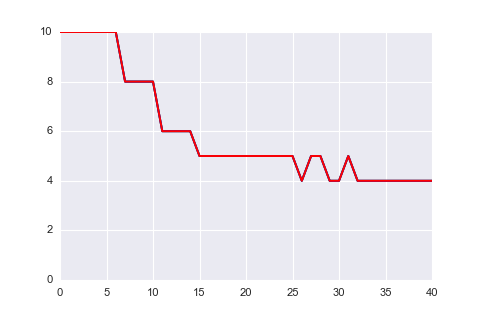

In [88]:
fig = plt.figure()
plt.plot(tiempo, riqueza_x, color="green")
plt.plot(tiempo, riqueza_y, color="blue")
plt.plot(tiempo, riqueza_z, color="red")
plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = 40)
plt.show() 

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


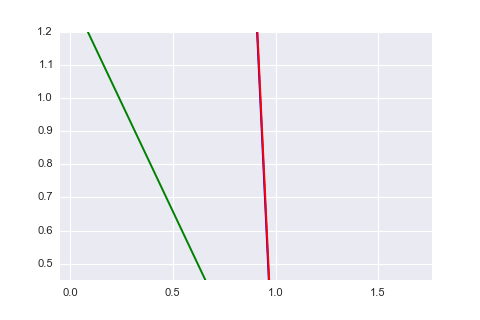

In [90]:
%matplotlib
fig = plt.figure()
fig.add_subplot(111)
#plt.plot(tiempo, x[:, [0]], color="red")
plt.plot(tiempo, x[:, [5]], color = "green")
plt.plot(tiempo, y[:, [5]], color = "blue")
plt.plot(tiempo, z[:, [5]], color = "red")
plt.xlim(xmax = 40)
plt.show() 

¿Cuáles son las condiciones iniciales?

In [32]:
print condiciones_iniciales

[  1.076   4.148   2.531   3.466   1.314   1.315   1.4    87.49    2.526
  99.705] [ 0.  2.  1.  1.  1.  0.  0.  0.  1.  0.]


¿Se pueden encontrar condiciones iniciales que aseguren la coexistencia de las 10 especies originales? Quizá no durante todo el tiempo de simulación porque el sistema tenderá al equilibrio, pero durante más tiempo al inicio de forma que haya posibilidad de que la migración / dinámica de metapoblación evite que se extingan por completo??

In [33]:
from copy import deepcopy

In [35]:
# Condiciones iniciales más altas, en el mismo orden de magnitud
condiciones_iniciales_2 = deepcopy(condiciones_iniciales)
condiciones_iniciales_2 = 10 * condiciones_iniciales_2
condiciones_iniciales_2[-1] = condiciones_iniciales_2[-1] / 10
condiciones_iniciales_2[-3] = condiciones_iniciales_2[-3] / 10
print condiciones_iniciales, condiciones_iniciales_2

[  1.076   4.148   2.531   3.466   1.314   1.315   1.4    87.49    2.526
  99.705] [  10.76    41.476   25.309   34.663   13.143   13.145   13.999  874.9
   25.261  997.047]


In [85]:
# Condiciones iniciales con diferentes órdenes de magnitud
# para diferentes niveles tróficos
ci3 = deepcopy(condiciones_iniciales)
ci3[[0, 5, 6]] = ci3[[0, 5, 6]] * 10
ci3[[2, 3, 4, 8]] = ci3[[2, 3, 4, 8]] * 1000
print ci3, identidades

[   10.76      4.148  2530.869  3466.334  1314.327    13.145    13.999
    87.49   2526.142    99.705] [ 0.  2.  1.  1.  1.  0.  0.  0.  1.  0.]


In [53]:
?vector_identidades_2

##### Nota
Quizá se trata de acoplar el sistema LV y la migración de forma que cuando el paisaje es por completo de vegetación primaria, coexistan las 10 especies. ¿Ya se intentó esto?

¿Quizá también se pueden reducir las tasas de reproducción un orden de magnitud?

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
# (From numericalmooc by Lorena Barba)
from IPython.core.display import HTML
css_file = "C:\Users\hp\Desktop\proyectof\style.css"
HTML(open(css_file, "r").read())